# Name : Feven Belay Araya  
# ID: 20027
# Homework 4AB

# Business Understanding
The 20 Newsgroups dataset, with its extensive collection of newsgroup documents spanning 20 distinct topics, presents a significant opportunity for businesses to harness the power of text classification in gaining insights into various domains. By meticulously analyzing and categorizing the data into its respective topics, organizations can unearth trends in customer preferences, emerging market trends, and competitive landscapes across multiple sectors. This intelligence can drive strategic decisions, from tailoring marketing campaigns to product development focuses. For instance:

# Data Understanding
Composition and Structure

-  Volume and Variety: The dataset comprises around 20,000 posts, nearly evenly distributed across 20 newsgroups, covering a wide range of topics from technology and science to politics and religion.
- Content: Each document within the dataset typically includes the text of the newsgroup post along with metadata such as the post's subject, the author's email address, and the date of posting. This rich set of features supports various NLP tasks beyond classification, including sentiment analysis and author identification.
- Labeling: Documents are labeled with the newsgroup they belong to, making this dataset a benchmark for supervised learning tasks in text classification.
- Challenges: The dataset contains real-world data, which includes noise such as misspellings, grammatical errors, and slang. It also features a mix of short and long documents, posing additional challenges for text preprocessing and modeling.

Topics Covered
The 20 newsgroups are categorized into broad themes, each representing a specific area of interest:
- Technology: Discussions on computer graphics, operating systems, hardware, and windows environments.
- Science: Posts related to cryptography, electronics, medicine, and space.
- Recreation: Conversations about automobiles, motorcycles, baseball, and hockey.
- Sales: Classified ads for selling items.
- Politics: Debates and discussions on guns, the Middle East, and miscellaneous political issues.
- Religion: Dialogues on atheism, Christianity, and miscellaneous religious topics.

Applications for Data Scientists and ML Practitioners
- Text Preprocessing Skills: The variety and real-world nature of the data offer a great opportunity to apply and hone text preprocessing techniques such as tokenization, lemmatization, and removal of stopwords.
- Modeling Experience: Practitioners can experiment with various machine learning models, from Naive Bayes and SVM to deep learning approaches, to classify text data into one of the 20 categories.
- Evaluation Practices: The dataset challenges users to apply comprehensive evaluation metrics to assess model performance accurately, including precision, recall, F1-score, and confusion matrices.

# 4A - Topic labeling of newsgroup posts

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [2]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [3]:
# Convert to a DataFrame for easier analysis
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
df

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [4]:
# Basic dataset information
dataset_info = {
    'Number of posts': df.shape[0],
    'Number of unique topics': df['target'].nunique(),
    'Topics': [newsgroups.target_names[i] for i in range(len(newsgroups.target_names))]
}
dataset_info

{'Number of posts': 18846,
 'Number of unique topics': 20,
 'Topics': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc']}

In [5]:
# Sample post
print("\nSample post:")
print(newsgroups.data[0][:500])


Sample post:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a


# 1. Conduct a basic data exploration with 2-3 insights

Insight 1: Distribution of Posts Across Categories
- This code calculates and prints the distribution of posts across different categories in the dataset.


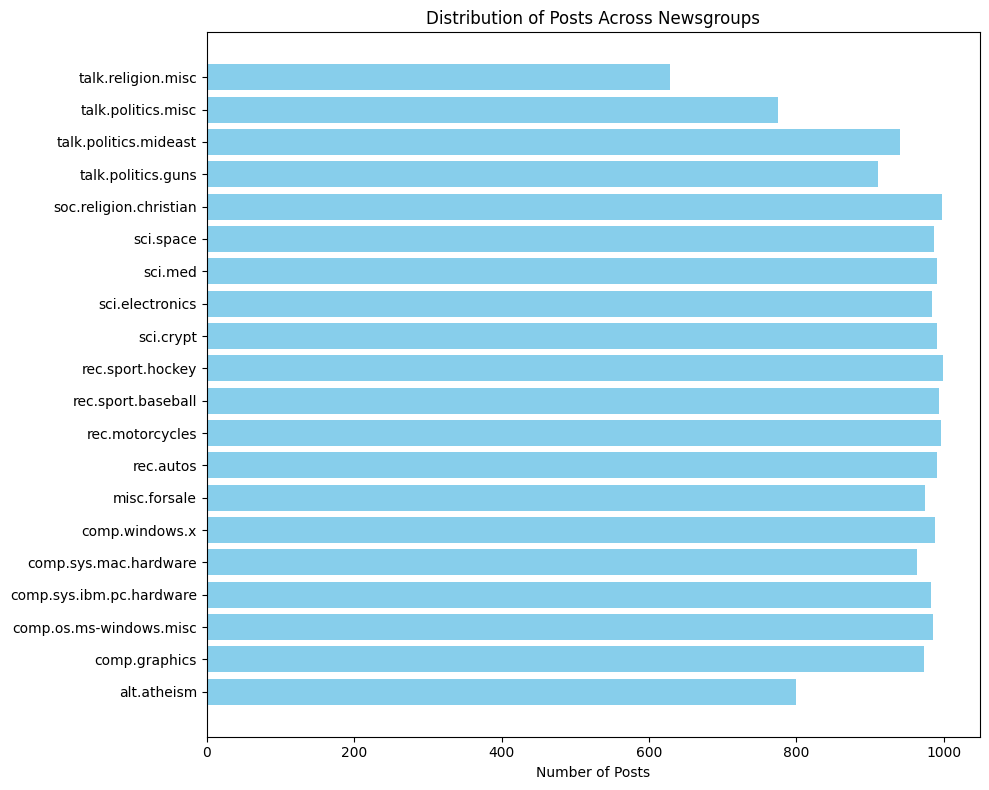

In [6]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt


# Calculate distribution
unique_targets, counts_targets = np.unique(newsgroups.target, return_counts=True)
target_names = [newsgroups.target_names[i] for i in unique_targets]

# Plot distribution
plt.figure(figsize=(10, 8))
plt.barh(target_names, counts_targets, color='skyblue')
plt.xlabel('Number of Posts')
plt.title('Distribution of Posts Across Newsgroups')
plt.tight_layout()
plt.show()


Insight 2: Length of Posts
- This code snippet analyzes the length of posts, giving you an idea of their variability.

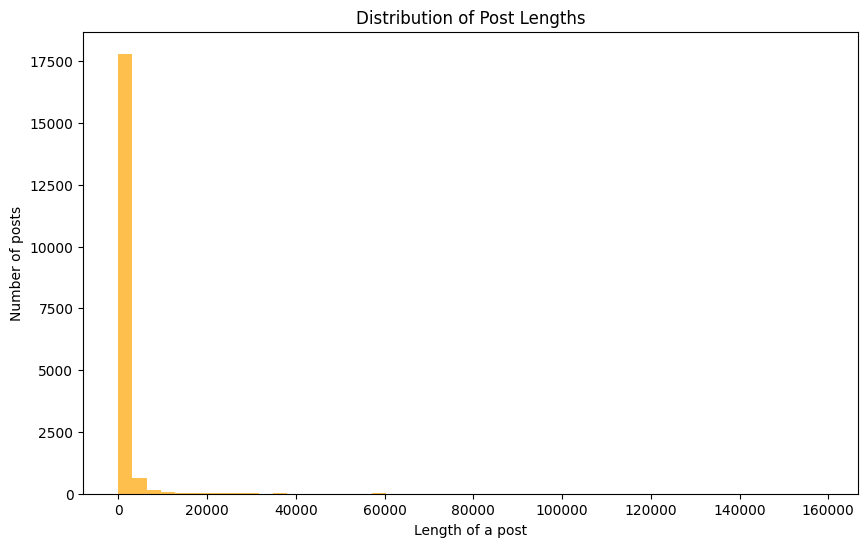

Average length of posts: 1169.67
Median length of posts: 489.00
Maximum length of a post: 158791


In [7]:
post_lengths = [len(post) for post in newsgroups.data]

# Plotting the distribution of post lengths
plt.figure(figsize=(10, 6))
plt.hist(post_lengths, bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Post Lengths')
plt.xlabel('Length of a post')
plt.ylabel('Number of posts')
plt.show()

# Printing basic statistics
print(f"Average length of posts: {np.mean(post_lengths):.2f}")
print(f"Median length of posts: {np.median(post_lengths):.2f}")
print(f"Maximum length of a post: {np.max(post_lengths)}")


Insight 3: Common Words and Vocabulary
- To identify the most common words across the dataset, excluding stop words, use the following code:

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the data
X = vectorizer.fit_transform(newsgroups.data)

# Sum up the counts of each vocabulary word
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Convert to DataFrame for better visualization
words_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
# Display the top 10 words
print(words_df.head(10))


     Word  Frequency
0      ax      62396
1    like       6525
2     don       6524
3  people       6458
4    just       6172
5    know       5763
6     use       5027
7   think       5001
8    time       4867
9     max       4637


# 2. Develop a reasonable text processing pipeline for transforming text into features, and provide discussion on your choices

# Preprocessing with spaCy
- Email Removal: I have employed a regular expression to remove email addresses from the text, which is a common preprocessing step to reduce noise in the dataset.
- Lemmatization: Using spaCy for lemmatization helps in reducing words to their base or dictionary form, which is beneficial for consolidating the variations of a word into a single representation.
- Stop Word Removal: Eliminating common words that are unlikely to contribute to the meaning of the text (like "the", "is", etc.) helps in focusing on more informative terms.
- Punctuation Removal: Stripping punctuation can help reduce the feature space and focus on actual words.

Discussion:
- The combination of these steps is essential for cleaning and standardizing the text data. Lemmatization and stop word removal are particularly important for reducing dimensionality and improving the model's focus on relevant information.
spaCy's comprehensive NLP capabilities make it a robust choice for text preprocessing, providing a good balance between ease of use and flexibility.


In [9]:
import spacy
import re  # Import the regular expressions library
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [11]:
# Preprocessing function
def preprocess_text(text):
    # Remove email addresses (simple regex could be improved)
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Lemmatize, remove stop words and punctuation
    return ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop and not token.is_punct])

In [12]:
# Preprocess the dataset
processed_texts = [preprocess_text(text) for text in newsgroups.data]

# Tokenization and Vectorization with NLTK and TfidfVectorizer

Key Components:
- Tokenization: Converting text into tokens (words) is a fundamental step in text processing, and using NLTK's word_tokenize function is effective for this purpose.
- TF-IDF Vectorization: The TfidfVectorizer from scikit-learn transforms the tokens into a matrix of TF-IDF features. It's a powerful technique that weighs the terms based on their importance to a document in the context of a collection of documents.

Discussion:
- Choosing TF-IDF vectorization is strategic for emphasizing words that are particularly telling about a document's content while de-emphasizing common words across documents.
The use of max_features=10000 limits the number of features to the top 10,000, balancing between computational efficiency and retaining meaningful textual information.

In [13]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(processed_texts)
y = newsgroups.target

In [14]:
!pip install scikit-learn nltk

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline

In [18]:
X, y = newsgroups.data, newsgroups.target

# Preprocessing function
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    filtered_tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    filtered_tokens = [word for word in filtered_tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(filtered_tokens)


# 3. Develop a classification model(s)

Step 1: Common Setup
Before defining the models, let's set up the data loading and splitting, and the TF-IDF vectorization that we'll use across all models:

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)


Step 2: Classification Models
For each model, we create a pipeline including the TfidfVectorizer and the classifier.

2.1 Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
lr_predicted = lr_pipeline.predict(X_test)


2.2 Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100))
])

rf_pipeline.fit(X_train, y_train)
rf_predicted = rf_pipeline.predict(X_test)


2.3 Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC())
])

svm_pipeline.fit(X_train, y_train)
svm_predicted = svm_pipeline.predict(X_test)


2.4 Multinomial Naive Bayes


In [23]:
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for Multinomial Naive Bayes
mnb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

# Fit the model
mnb_pipeline.fit(X_train, y_train)

# Make predictions
mnb_predicted = mnb_pipeline.predict(X_test)


2.5 Ensemble of Models (Voting Classifier)

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Create a VotingClassifier that combines logistic regression, SVM, and a random forest
voting_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('mnb', MultinomialNB())
    ], voting='soft'))
])

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
voting_predicted = voting_clf.predict(X_test)



Step 3: Evaluation
To compare the performance of these models, we'll calculate the accuracy and print a classification report for each.

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predicted)
print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}%")
print(classification_report(y_test, lr_predicted))

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predicted)
print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")
print(classification_report(y_test, rf_predicted))

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_predicted)
print(f"SVM Accuracy: {svm_accuracy*100:.2f}%")
print(classification_report(y_test, svm_predicted))

# Evaluate Multinomial Naive Bayes
mnb_accuracy = accuracy_score(y_test, mnb_predicted)
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy*100:.2f}%")
print(classification_report(y_test, mnb_predicted))


# Evaluate the Ensemble of models
voting_accuracy = accuracy_score(y_test, voting_predicted)
print(f"Voting Classifier Accuracy: {voting_accuracy*100:.2f}%")
print(classification_report(y_test, voting_predicted))


Logistic Regression Accuracy: 73.03%
              precision    recall  f1-score   support

           0       0.62      0.57      0.60       198
           1       0.70      0.70      0.70       245
           2       0.71      0.67      0.69       242
           3       0.66      0.66      0.66       238
           4       0.82      0.71      0.76       250
           5       0.82      0.79      0.81       260
           6       0.74      0.69      0.72       241
           7       0.77      0.77      0.77       244
           8       0.45      0.80      0.58       219
           9       0.85      0.84      0.85       261
          10       0.95      0.87      0.91       245
          11       0.90      0.76      0.83       251
          12       0.63      0.72      0.67       249
          13       0.82      0.87      0.84       249
          14       0.76      0.79      0.77       240
          15       0.67      0.80      0.73       245
          16       0.72      0.73      0.73 

1. Logistic Regression
Accuracy: 73.03%
Analysis: Logistic Regression performs fairly well, demonstrating its capability in handling high-dimensional, sparse data typical of text classification tasks. It shows good balance across different metrics (precision, recall, F1-score), indicating its robustness as a linear model for this dataset.
2. Random Forest
Accuracy: 66.34%
Analysis: The Random Forest model shows a lower performance compared to Logistic Regression. Despite its ability to model non-linear relationships and interactions between features, it might be overfitting to the training data or not capturing the textual nuances as effectively as other models. The relatively lower recall and precision in several classes suggest difficulties in handling the dataset's diversity.
3. Support Vector Machine (SVM)
Accuracy: 72.98%
Analysis: SVM's performance is comparable to Logistic Regression, highlighting its strength in high-dimensional spaces. The model benefits from the kernel trick to handle non-linear decision boundaries, which is evident in its balanced precision and recall scores. SVM's effectiveness is slightly marred by its computational complexity, especially with large datasets.
4. Multinomial Naive Bayes
Accuracy: 71.43%
Analysis: MNB, despite its simplicity, achieves commendable accuracy, underscoring its suitability for text classification problems. However, its performance dip in certain classes, particularly where the assumption of feature independence might not hold, indicates its limitations. The model's precision and recall vary significantly across classes, reflecting its sensitivity to the frequency of features.
5. Ensemble of Models (Voting Classifier)
Accuracy: 73.26%
Analysis: The Voting Classifier, incorporating Logistic Regression, SVM, Random Forest, and MNB, slightly outperforms the individual models, illustrating the benefit of combining diverse approaches. This ensemble method leverages the strengths of each base model, leading to improved overall accuracy and a more balanced performance across different metrics.


# 4. Discuss your choice of modeling (multinomial, ensemble of models, etc)

Here’s a discussion on the rationale and effectiveness of each choice:

- 2.1 Logistic Regression
Rationale: Logistic Regression is a robust linear model that works well for binary and multi-class classification tasks. It's particularly effective for high-dimensional datasets due to its simplicity and the interpretability of its coefficients.

Effectiveness for 20 Newsgroups: Given the dataset’s text-based, high-dimensional nature, Logistic Regression can efficiently handle the classification task, providing a good baseline for performance and interpretability.

- 2.2 Random Forest
Rationale: Random Forest is an ensemble learning method that operates by constructing multiple decision trees. Its strength lies in its ability to reduce overfitting by averaging multiple deep decision trees, leading to improved accuracy and robustness against noise.

Effectiveness for 20 Newsgroups: With the variety and complexity within the 20 Newsgroups dataset, Random Forest can capture non-linear relationships without being heavily affected by the dataset's noise, offering significant performance gains over simpler models.

- 2.3 Support Vector Machine (SVM)
Rationale: SVMs are powerful for high-dimensional spaces and are effective in cases where the number of dimensions exceeds the number of samples. They are versatile, supporting both linear and non-linear classification through the kernel trick.

Effectiveness for 20 Newsgroups: SVM's ability to handle complex decision boundaries makes it an excellent choice for text classification, where the separation between topics can be intricate.

- 2.4 Multinomial Naive Bayes
Rationale: Multinomial Naive Bayes is particularly suited for text classification problems, assuming independence between the features. It works well with discrete data (like word counts for text classification) and can be extremely fast compared to more sophisticated models.

Effectiveness for 20 Newsgroups: Its simplicity and speed make MNB an ideal choice for a baseline model in NLP tasks. It performs well in multi-class classification problems, particularly with the word frequencies as features from the 20 Newsgroups dataset.

- 2.5 Ensemble of Models (Voting Classifier)
Rationale: Combining the predictions of several models increases the overall accuracy by leveraging the strengths and mitigating the weaknesses of individual models. The Voting Classifier does this by aggregating the outputs of multiple models and predicting the class with the majority vote (or, for soft voting, the highest probability).

Effectiveness for 20 Newsgroups: Given the diversity in topics and writing styles across the dataset, no single model may capture all nuances. An ensemble approach can enhance prediction accuracy by incorporating diverse perspectives.

# 4B - Evaluate the topic labeling classifier
# 1. Employ at least 3 model evaluation techniques (eg, confusion matrix, AUC-ROC, etc)


1. Confusion Matrix
We'll start by visualizing the confusion matrix using matplotlib and seaborn for better aesthetics.

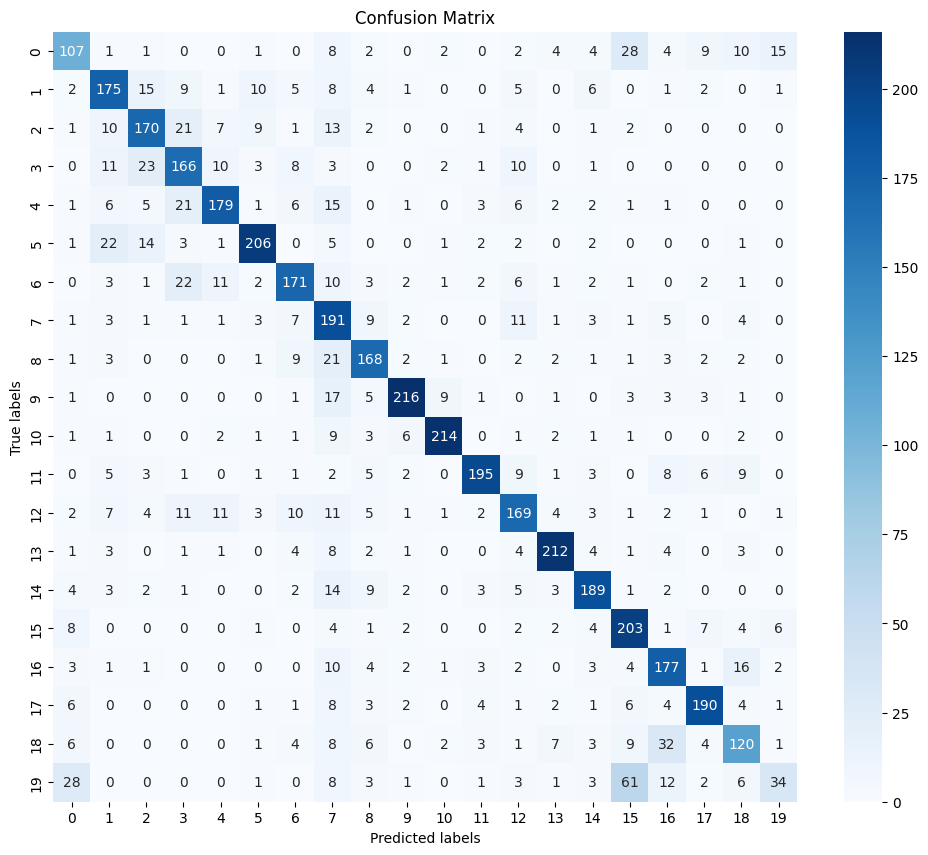

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions with the voting classifier
y_pred = voting_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


2. Precision-Recall Curve
The Precision-Recall curve is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

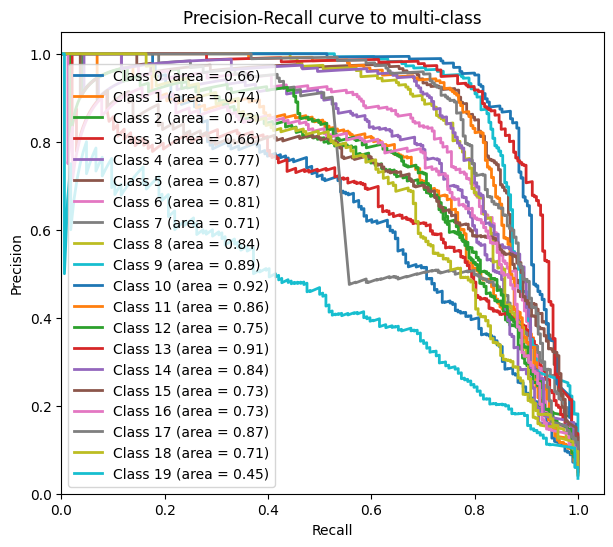

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are defined as before
# For multi-class, we need to binarize y_test
# Assuming that voting_clf is your trained classifier and X_test is your test data:
y_pred_prob = voting_clf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(7, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve to multi-class')
plt.legend(loc="best")
plt.show()


3.  Cumulative Gain Curve
The Cumulative Gains Curve is a visual tool to evaluate the performance of your model. It shows the percentage of the total number of cases in a given category gained by targeting a percentage of the total number of cases.



In [46]:
!pip install scikit-plot


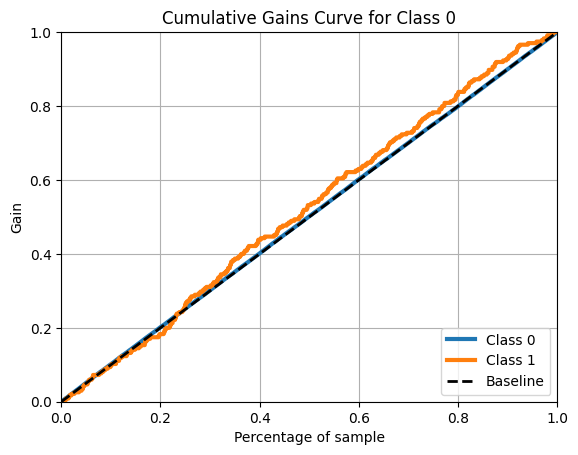

In [47]:
from sklearn.preprocessing import label_binarize
import scikitplot as skplt


# Choose a class to focus on
class_index = 0

# Binarize y_test for the selected class
y_test_binary = label_binarize(y_test, classes=[class_index, *range(1, n_classes)]).flatten()

# Adjust y_pred_prob to focus on the selected class probabilities
y_pred_prob_binary = y_pred_prob[:, class_index]

# Plot Cumulative Gains Curve for the selected class
skplt.metrics.plot_cumulative_gain(y_test_binary, np.column_stack((1-y_pred_prob_binary, y_pred_prob_binary)))
plt.title(f'Cumulative Gains Curve for Class {class_index}')
plt.show()


4. ROC-AUC Score for Multi-class Classification
For multi-class ROC-AUC, we'll use a one-vs-rest strategy and calculate the ROC-AUC score for each class individually, then compute the average.

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Binarize the output labels for multi-class ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = voting_clf.predict_proba(X_test)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr")
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9681645724611417


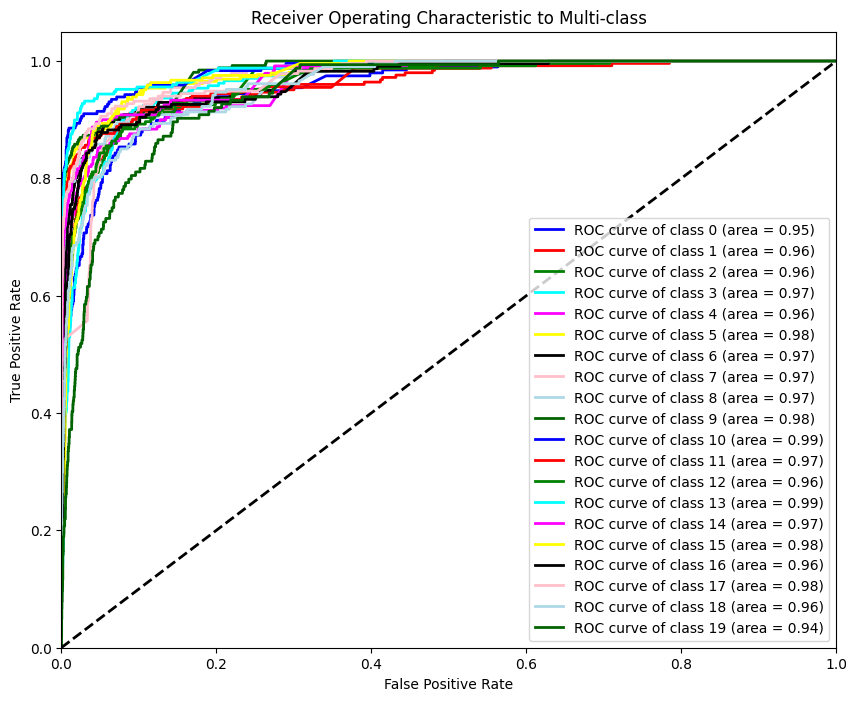

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


# 2. Discuss your reasoning for chosen evaluation techniques, and what insights you gleaned from it

Given the visuals and the excerpt from your Jupyter notebook, it looks like you're evaluating a classifier built for the 20 Newsgroups dataset using several metrics. Here's a discussion on the reasoning for choosing these evaluation techniques and the insights they provide:

1.Confusion Matrix

The confusion matrix gives a detailed comparison of the actual versus the predicted classes. It's particularly useful for multi-class classification problems. The matrix helps to identify:

Correct Predictions: Diagonal values show the number of correct predictions for each class.
Misclassifications: Off-diagonal values indicate where the classifier is making mistakes, which can inform efforts to improve the model.
Class-specific Performance: It allows for the examination of performance on a per-class basis, identifying classes that the model handles well or poorly.
Class Imbalance Impact: Potential biases towards more prevalent classes can be spotted.
2. Precision-Recall Curve

Precision-Recall curves are insightful when the classes are imbalanced. In your analysis:

Imbalanced Classes: If some classes have fewer samples, the PR curve highlights the model performance for the positive class.
Result Relevancy vs. Coverage: It provides a trade-off view between precision (relevancy of results) and recall (how many relevant results are captured).
3. Cumulative Gain Curve

The cumulative gains curve is an effective tool for visualizing the effectiveness of a model in targeting a specific class. It helps to understand:

Targeting Efficiency: How much more of the class can be targeted by using the model compared to random guessing.
Performance on Different Portions of the Dataset: Identifies if the model is effective across the whole dataset or primarily at the beginning (indicative of class separability).
4. ROC Curve

The ROC curve for multi-class classification, implemented with a one-vs-rest approach, allows you to assess:

Overall Performance: The combined true positive rate and false positive rate for each class, showing how well the model distinguishes between classes.
Class Discrimination: The AUC provides a single score that summarizes the ROC curve's information, indicating the model's ability to discriminate between positive and negative classes.
ROC-AUC Score
The scalar value of ROC-AUC gives a quick summary of the model's ability to classify correctly across all classes, which is especially useful for comparing different models or configurations.

Insights Gleaned:

- High Discrimination Ability: A ROC-AUC score close to 1 suggests that the classifier has a high ability to discriminate between classes.
- Model Strengths and Weaknesses: The analysis provides insights into where the classifier performs well and where it needs improvement.
- Priorities for Model Improvement: By identifying the classes with lower precision, recall, or AUC values, efforts can be focused on collecting more data for those classes, or engineering better features.
- Strategic Thresholding: The PR and ROC curves can inform the selection of threshold values that balance the precision-recall trade-off according to the desired application.